In [1]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/water-quality-prediction/Water Quality Prediction.csv')

In [4]:
df.head(5)

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [5]:
df.tail(5)

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
1048570,1048570,8.186428,1.977157e-02,5.968850,115.963429,1.590000e-113,2.277221,Near Colorless,0.020610,1.194165,...,2.718928,2.603963e-02,220.571485,Stream,5.491908,43.817452,March,15.0,14.0,0
1048571,1048571,8.046225,1.160000e-05,3.678714,148.053168,5.930000e-25,0.483369,Near Colorless,0.878835,1.203689,...,2.312058,4.427830e-02,406.095969,Lake,10.143768,34.626853,December,16.0,0.0,0
1048572,1048572,7.443582,3.103077e-03,7.893399,174.677900,1.080000e-15,1.461659,Near Colorless,0.701053,0.115412,...,3.410297,2.350000e-05,439.086461,Spring,14.612881,55.460415,June,18.0,16.0,0
1048573,1048573,6.897232,6.980000e-10,5.757980,125.564223,1.300000e-18,0.804589,Near Colorless,0.156424,0.554729,...,2.803234,3.220000e-19,278.051032,Well,7.351956,65.055864,May,5.0,3.0,0
1048574,1048574,8.330849,2.996820e-04,2.360790,187.440277,5.650000e-243,1.157979,Colorless,0.272353,0.037678,...,3.589297,3.050000e-08,232.443406,NaN,10.493711,59.265142,April,19.0,21.0,0


In [6]:
features_to_drop=['Index','Color','Source','Month','Day','Time of Day']
df.drop(columns=features_to_drop,inplace=True)

In [7]:
df.shape

(1048575, 18)

In [8]:
df.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine',
       'Manganese', 'Total Dissolved Solids', 'Water Temperature',
       'Air Temperature', 'Target'],
      dtype='object')

In [9]:
df.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Target
count,1.028344e+06,1.041584e+06,1.029880e+06,1.017741e+06,1.043891e+06,1.020900e+06,1.039881e+06,1.015357e+06,1.013693e+06,1.017243e+06,1.014050e+06,1.019772e+06,1.038413e+06,1.029236e+06,1.048277e+06,1.018887e+06,1.043272e+06,1.048575e+06
mean,7.449869e+00,1.139646e-01,6.078584e+00,1.818660e+02,1.291635e-03,1.528928e+00,4.835915e-01,9.410137e-01,4.939443e-01,1.772788e+00,1.446009e+02,4.248376e+02,3.236978e+00,9.352826e-02,2.647872e+02,1.915360e+01,6.003251e+01,2.295821e-01
std,8.478455e-01,4.433188e-01,3.131874e+00,6.576657e+01,3.030129e-02,1.505436e+00,8.614735e-01,7.924903e-01,5.662430e-01,1.051316e+00,6.672156e+01,1.897561e+02,7.150808e-01,4.403703e-01,1.543697e+02,1.137963e+01,1.808397e+01,4.205643e-01
min,2.058008e+00,2.050000e-53,2.861727e-01,2.941350e+01,0.000000e+00,6.350000e-07,1.410000e-14,4.550000e-06,2.100000e-09,1.100125e-02,1.194073e+01,1.305482e+01,9.994110e-01,1.380000e-46,1.064299e-02,6.661938e-01,-3.387091e+01,0.000000e+00
25%,6.914812e+00,8.950000e-06,3.952811e+00,1.374347e+02,8.290000e-123,4.127921e-01,3.692472e-02,3.706065e-01,1.260900e-01,8.772584e-01,9.746143e+01,2.863260e+02,2.737515e+00,2.060000e-06,1.318069e+02,1.135982e+01,4.784209e+01,0.000000e+00
50%,7.452940e+00,2.054149e-03,5.564798e+00,1.747464e+02,1.520000e-62,1.074800e+00,1.997574e-01,7.654291e-01,3.389322e-01,1.744323e+00,1.339778e+02,3.970023e+02,3.198937e+00,5.372950e-04,2.635694e+02,1.646738e+01,6.002168e+01,0.000000e+00
75%,8.001406e+00,4.977795e-02,7.584930e+00,2.156446e+02,2.820000e-27,2.214154e+00,5.928613e-01,1.318265e+00,6.789152e-01,2.611824e+00,1.803459e+02,5.333383e+02,3.685177e+00,1.369394e-02,3.949597e+02,2.386571e+01,7.223478e+01,0.000000e+00
max,1.289196e+01,1.574860e+01,7.307293e+01,1.430549e+03,3.503948e+00,2.836867e+01,1.929611e+01,1.285171e+01,1.139056e+01,4.141991e+00,1.393433e+03,1.891516e+03,1.068842e+01,2.374086e+01,5.797995e+02,2.430051e+02,1.440785e+02,1.000000e+00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   pH                      1028344 non-null  float64
 1   Iron                    1041584 non-null  float64
 2   Nitrate                 1029880 non-null  float64
 3   Chloride                1017741 non-null  float64
 4   Lead                    1043891 non-null  float64
 5   Zinc                    1020900 non-null  float64
 6   Turbidity               1039881 non-null  float64
 7   Fluoride                1015357 non-null  float64
 8   Copper                  1013693 non-null  float64
 9   Odor                    1017243 non-null  float64
 10  Sulfate                 1014050 non-null  float64
 11  Conductivity            1019772 non-null  float64
 12  Chlorine                1038413 non-null  float64
 13  Manganese               1029236 non-null  float64
 14  To

In [11]:
df.nunique()

pH                         996595
Iron                       669099
Nitrate                    998213
Chloride                   986621
Lead                       233165
Zinc                       989688
Turbidity                  988790
Fluoride                   984406
Copper                     982372
Odor                       986355
Sulfate                    983313
Conductivity               988666
Chlorine                  1006096
Manganese                  593290
Total Dissolved Solids    1015462
Water Temperature          987818
Air Temperature           1010729
Target                          2
dtype: int64

In [12]:
df.isnull().sum()

pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Water Temperature         29688
Air Temperature            5303
Target                        0
dtype: int64

<Axes: >

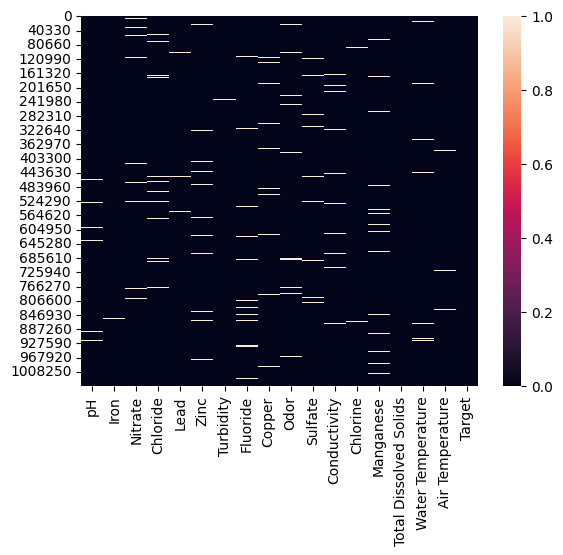

In [13]:
sns.heatmap(df.isnull())

<Axes: >

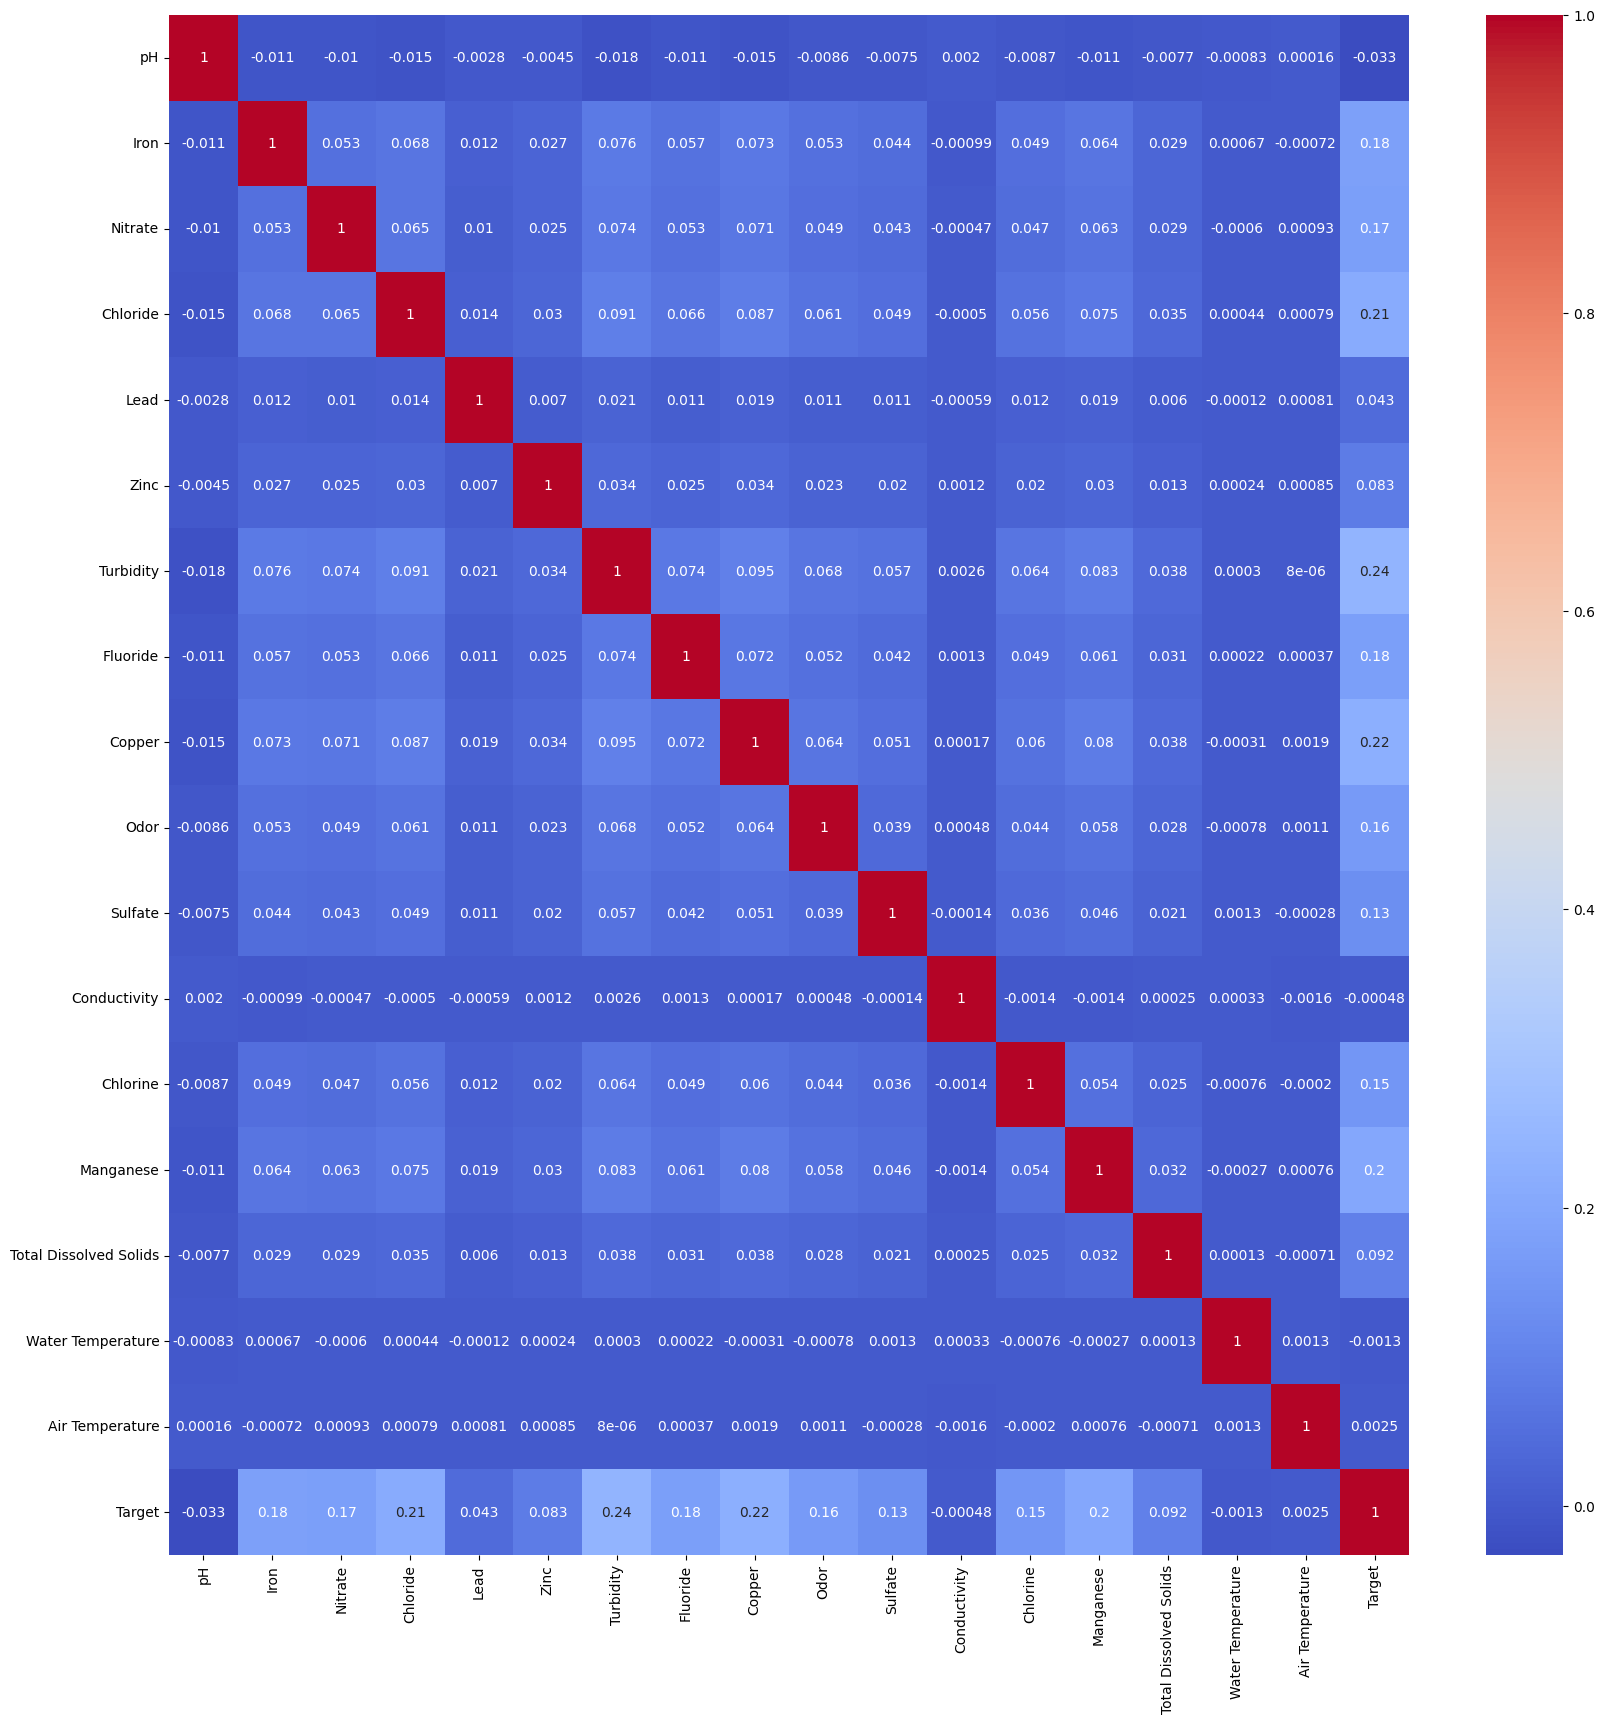

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [15]:
# Unstacking the correlation matrix to see the values more clearly.
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

pH         pH          1.000000
Copper     Copper      1.000000
Iron       Iron        1.000000
Turbidity  Target      0.238197
Copper     Target      0.224924
Target     Chloride    0.210885
dtype: float64

In [16]:
df.dropna(inplace=True)

In [17]:
print(df.isnull().sum())

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Water Temperature         0
Air Temperature           0
Target                    0
dtype: int64


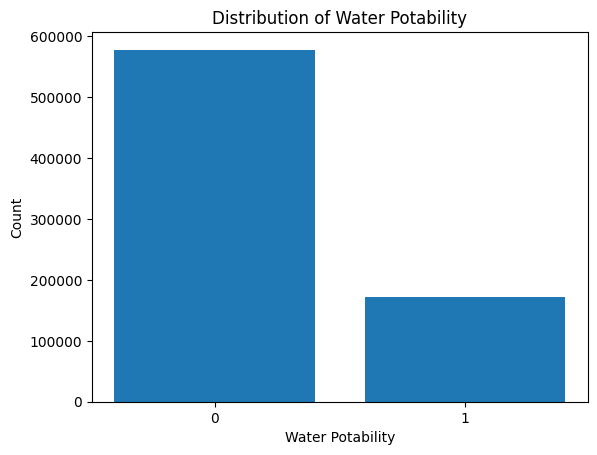

In [18]:
target_counts = df['Target'].value_counts()
plt.bar(target_counts.index.astype(str), target_counts.values)
plt.xlabel('Water Potability')
plt.ylabel('Count')
plt.title('Distribution of Water Potability')
plt.show()

In [19]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Target
1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,15.348981,71.220586,0
2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,11.643467,44.891330,0
4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,15.249416,69.336671,0
7,7.258203,6.110000e-09,9.261676,182.242341,4.400000e-224,0.416478,0.047803,1.016196,0.298093,3.144199,114.551427,160.062557,2.325094,6.020000e-16,214.553104,15.891905,61.139140,0
9,7.100650,3.019038e-03,3.620641,157.043934,6.460000e-148,0.112994,0.050613,0.842107,0.391602,2.713379,167.417837,583.295321,2.284971,8.840000e-07,113.909077,11.899376,14.010268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.186428,1.977157e-02,5.968850,115.963429,1.590000e-113,2.277221,0.020610,1.194165,0.006663,3.149487,43.969084,227.409325,2.718928,2.603963e-02,220.571485,5.491908,43.817452,0
1048571,8.046225,1.160000e-05,3.678714,148.053168,5.930000e-25,0.483369,0.878835,1.203689,0.171610,0.894528,74.133056,124.828663,2.312058,4.427830e-02,406.095969,10.143768,34.626853,0
1048572,7.443582,3.103077e-03,7.893399,174.677900,1.080000e-15,1.461659,0.701053,0.115412,0.641379,3.150154,201.977606,337.630357,3.410297,2.350000e-05,439.086461,14.612881,55.460415,0
1048573,6.897232,6.980000e-10,5.757980,125.564223,1.300000e-18,0.804589,0.156424,0.554729,0.018875,1.997442,204.391754,569.077747,2.803234,3.220000e-19,278.051032,7.351956,65.055864,0


In [20]:
X = df.drop('Target', axis=1)
y = df['Target']

<Axes: xlabel='pH'>

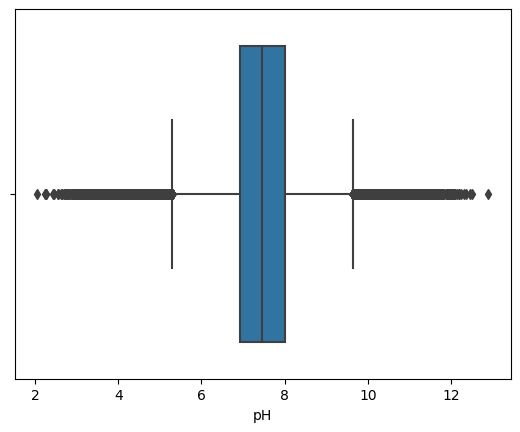

In [21]:
sns.boxplot(x='pH', data=df)

In [22]:
# Calculate IQR
Q1 = df['pH'].quantile(0.25)  # First quartile
Q3 = df['pH'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['pH'] >= lower_bound) & (df['pH'] <= upper_bound)]

In [23]:
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
2        5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
...           ...           ...       ...         ...            ...   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048571  8.046225  1.160000e-05  3.678714  148.053168   5.930000e-25   
1048572  7.443582  3.103077e-03  7.893399  174.677900   1.080000e-15   
1048573  6.897232  6.980000e-10  5.757980  125.564223   1.300000e-18   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='pH'>

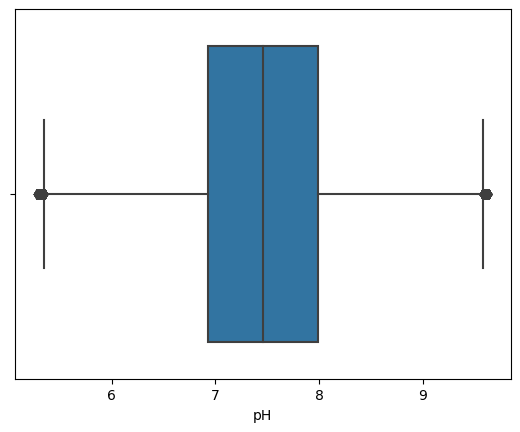

In [24]:
sns.boxplot(x='pH', data=df)

<Axes: xlabel='Iron'>

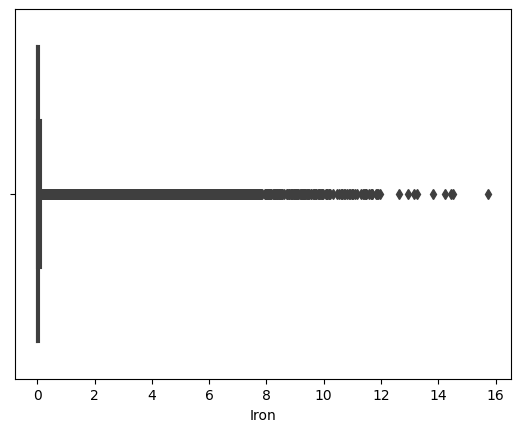

In [25]:
sns.boxplot(x='Iron', data=df)

In [26]:
# Calculate IQR
Q1 = df['Iron'].quantile(0.25)  # First quartile
Q3 = df['Iron'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Iron'] >= lower_bound) & (df['Iron'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
2        5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
...           ...           ...       ...         ...            ...   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048571  8.046225  1.160000e-05  3.678714  148.053168   5.930000e-25   
1048572  7.443582  3.103077e-03  7.893399  174.677900   1.080000e-15   
1048573  6.897232  6.980000e-10  5.757980  125.564223   1.300000e-18   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Iron'>

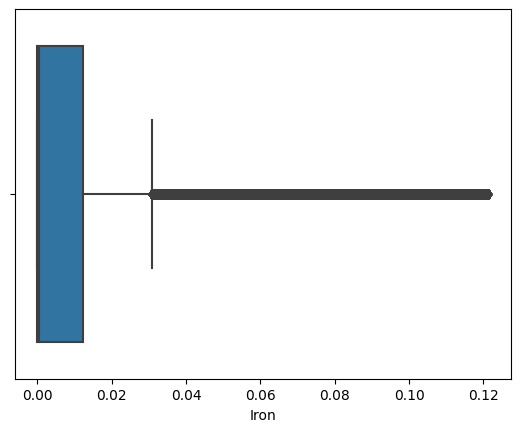

In [27]:
sns.boxplot(x='Iron', data=df)

<Axes: xlabel='Nitrate'>

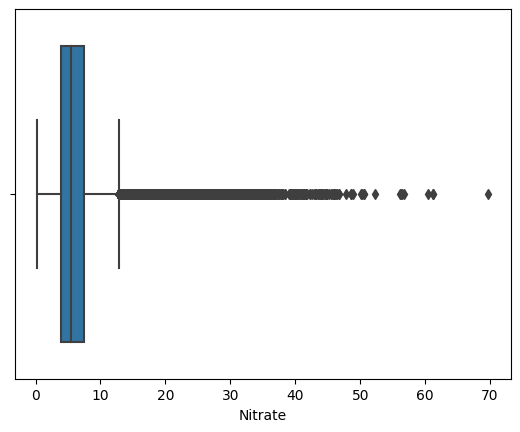

In [28]:
sns.boxplot(x='Nitrate', data=df)

In [29]:
# Calculate IQR
Q1 = df['Nitrate'].quantile(0.25)  # First quartile
Q3 = df['Nitrate'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Nitrate'] >= lower_bound) & (df['Nitrate'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
2        5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
...           ...           ...       ...         ...            ...   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048571  8.046225  1.160000e-05  3.678714  148.053168   5.930000e-25   
1048572  7.443582  3.103077e-03  7.893399  174.677900   1.080000e-15   
1048573  6.897232  6.980000e-10  5.757980  125.564223   1.300000e-18   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Nitrate'>

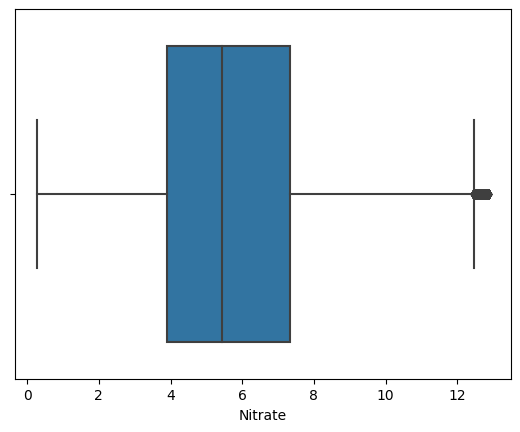

In [30]:
sns.boxplot(x='Nitrate', data=df)

<Axes: xlabel='Chloride'>

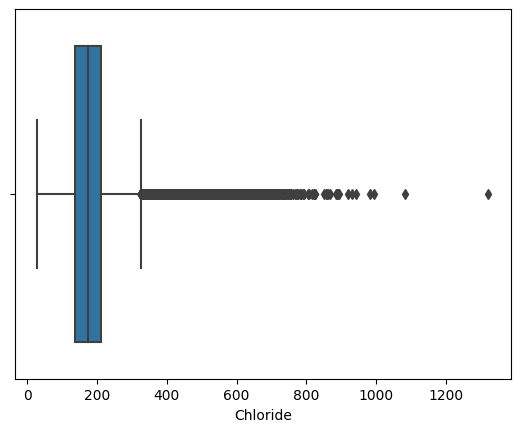

In [31]:
sns.boxplot(x='Chloride', data=df)

In [32]:
# Calculate IQR
Q1 = df['Chloride'].quantile(0.25)  # First quartile
Q3 = df['Chloride'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Chloride'] >= lower_bound) & (df['Chloride'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
2        5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
...           ...           ...       ...         ...            ...   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048571  8.046225  1.160000e-05  3.678714  148.053168   5.930000e-25   
1048572  7.443582  3.103077e-03  7.893399  174.677900   1.080000e-15   
1048573  6.897232  6.980000e-10  5.757980  125.564223   1.300000e-18   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Chloride'>

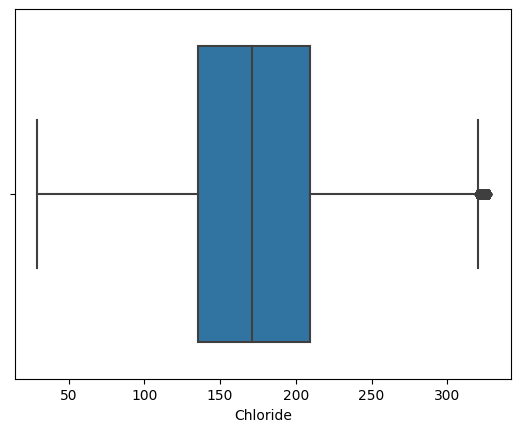

In [33]:
sns.boxplot(x='Chloride', data=df)

<Axes: xlabel='Lead'>

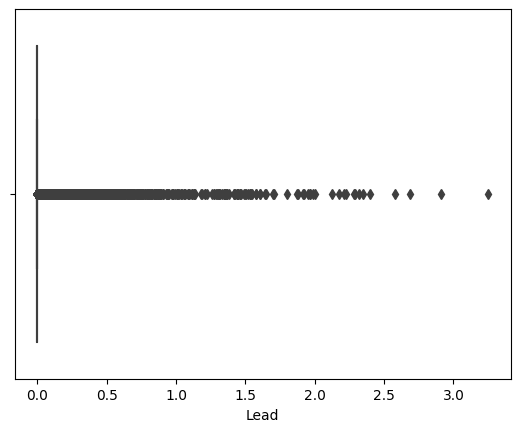

In [34]:
sns.boxplot(x='Lead', data=df)

In [35]:
# Calculate IQR
Q1 = df['Lead'].quantile(0.25)  # First quartile
Q3 = df['Lead'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Lead'] >= lower_bound) & (df['Lead'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
2        5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
...           ...           ...       ...         ...            ...   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Lead'>

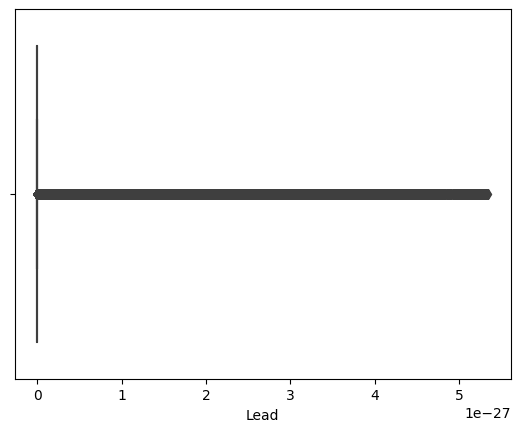

In [36]:
sns.boxplot(x='Lead', data=df)

<Axes: xlabel='Zinc'>

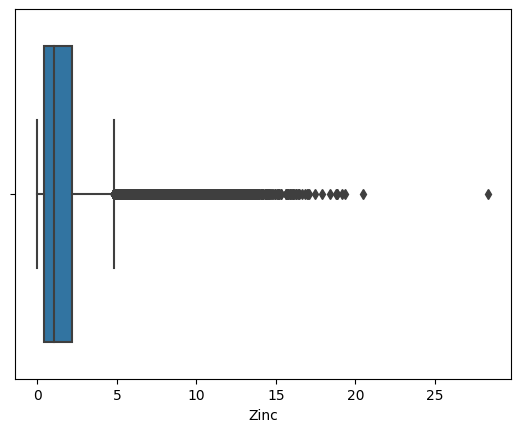

In [37]:
sns.boxplot(x='Zinc', data=df)

In [38]:
# Calculate IQR
Q1 = df['Zinc'].quantile(0.25)  # First quartile
Q3 = df['Zinc'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Zinc'] >= lower_bound) & (df['Zinc'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
2        5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
...           ...           ...       ...         ...            ...   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Zinc'>

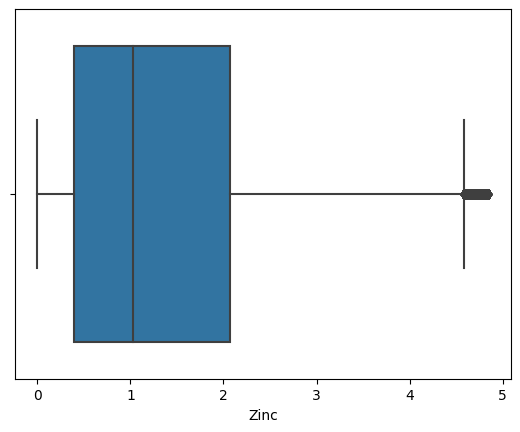

In [39]:
sns.boxplot(x='Zinc', data=df)

<Axes: xlabel='Turbidity'>

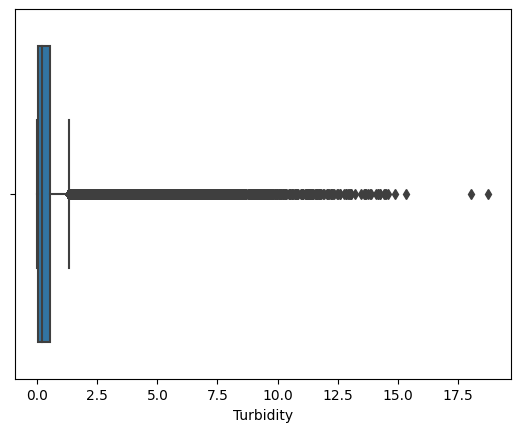

In [40]:
sns.boxplot(x='Turbidity', data=df)

In [41]:
# Calculate IQR
Q1 = df['Turbidity'].quantile(0.25)  # First quartile
Q3 = df['Turbidity'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Turbidity'] >= lower_bound) & (df['Turbidity'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
2        5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
...           ...           ...       ...         ...            ...   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Turbidity'>

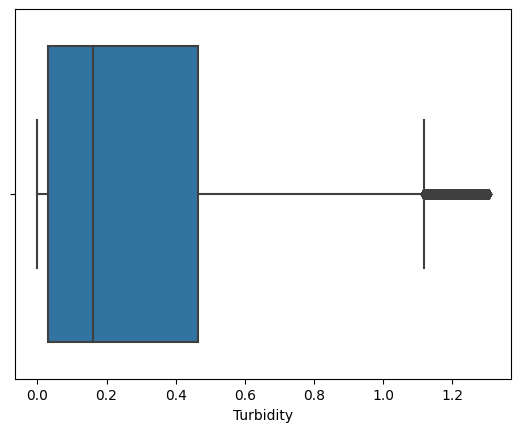

In [42]:
sns.boxplot(x='Turbidity', data=df)

<Axes: xlabel='Fluoride'>

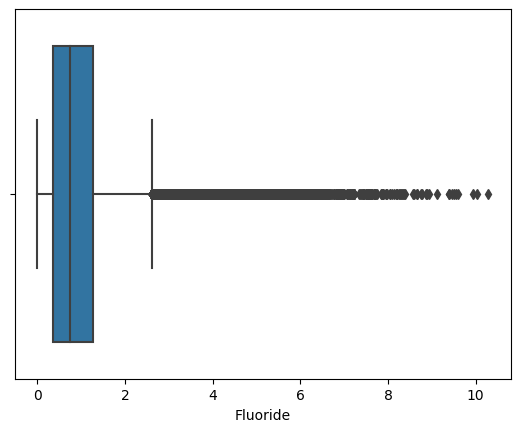

In [43]:
sns.boxplot(x='Fluoride', data=df)

In [44]:
# Calculate IQR
Q1 = df['Fluoride'].quantile(0.25)  # First quartile
Q3 = df['Fluoride'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Fluoride'] >= lower_bound) & (df['Fluoride'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
2        5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
...           ...           ...       ...         ...            ...   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Fluoride'>

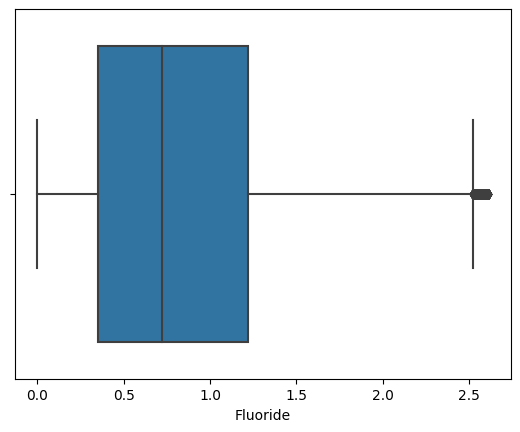

In [45]:
sns.boxplot(x='Fluoride', data=df)

<Axes: xlabel='Copper'>

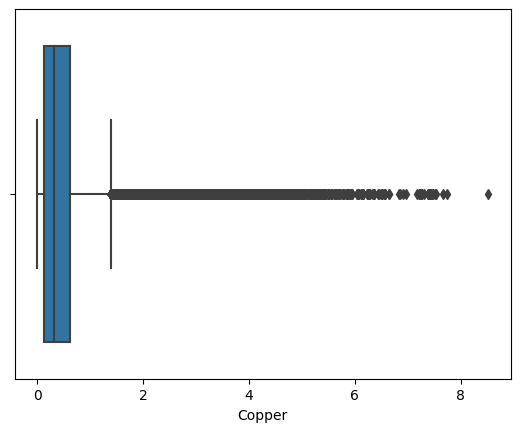

In [46]:
sns.boxplot(x='Copper', data=df)

In [47]:
# Calculate IQR
Q1 = df['Copper'].quantile(0.25)  # First quartile
Q3 = df['Copper'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Copper'] >= lower_bound) & (df['Copper'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
2        5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
...           ...           ...       ...         ...            ...   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Copper'>

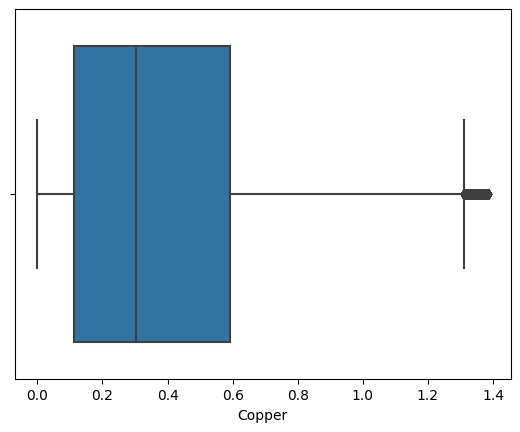

In [48]:
sns.boxplot(x='Copper', data=df)

<Axes: xlabel='Odor'>

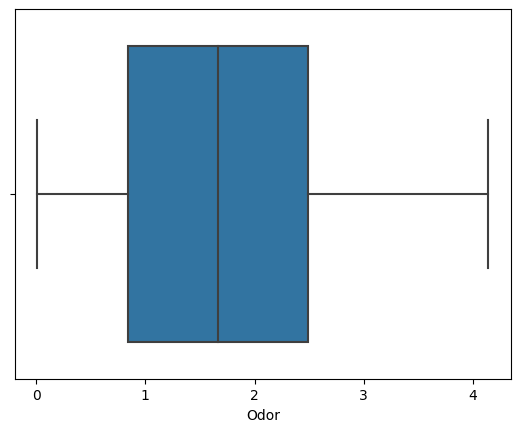

In [49]:
sns.boxplot(x='Odor', data=df)

<Axes: xlabel='Sulfate'>

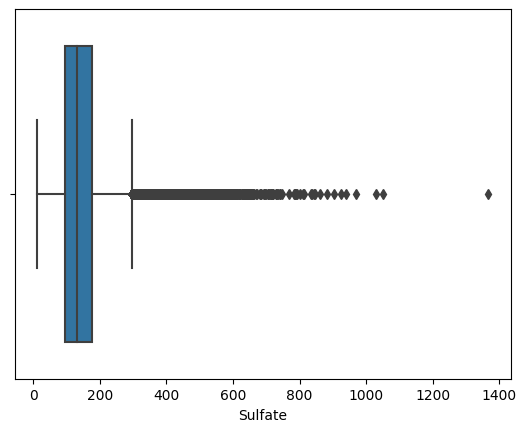

In [50]:
sns.boxplot(x='Sulfate', data=df)

In [51]:
# Calculate IQR
Q1 = df['Sulfate'].quantile(0.25)  # First quartile
Q3 = df['Sulfate'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Sulfate'] >= lower_bound) & (df['Sulfate'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
2        5.443762  2.010586e-02  3.816994  230.995630   5.290000e-76   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
...           ...           ...       ...         ...            ...   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Sulfate'>

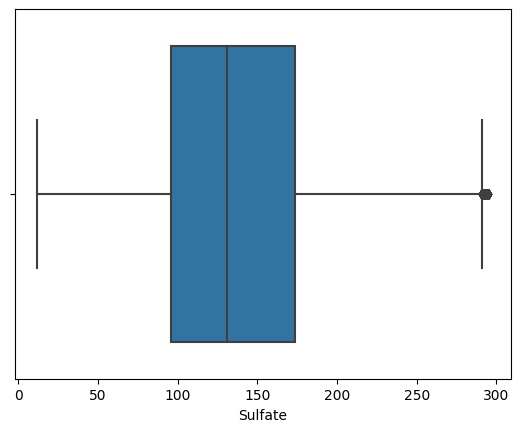

In [52]:
sns.boxplot(x='Sulfate', data=df)

<Axes: xlabel='Conductivity'>

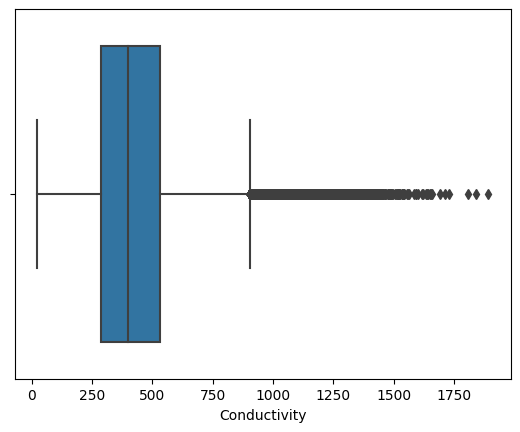

In [53]:
sns.boxplot(x='Conductivity', data=df)

In [54]:
# Calculate IQR
Q1 = df['Conductivity'].quantile(0.25)  # First quartile
Q3 = df['Conductivity'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Conductivity'] >= lower_bound) & (df['Conductivity'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
11       7.806685  1.160000e-14  8.763706   89.253163   1.360000e-46   
...           ...           ...       ...         ...            ...   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Conductivity'>

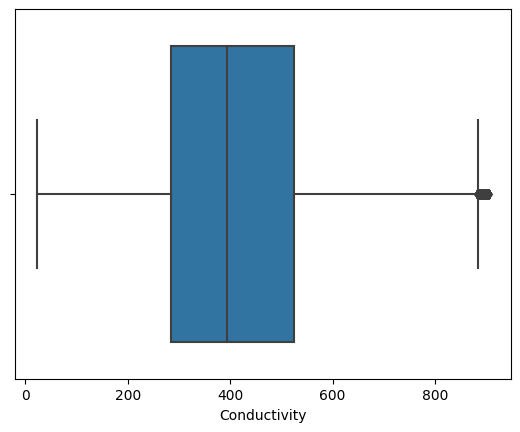

In [55]:
sns.boxplot(x='Conductivity', data=df)

<Axes: xlabel='Chlorine'>

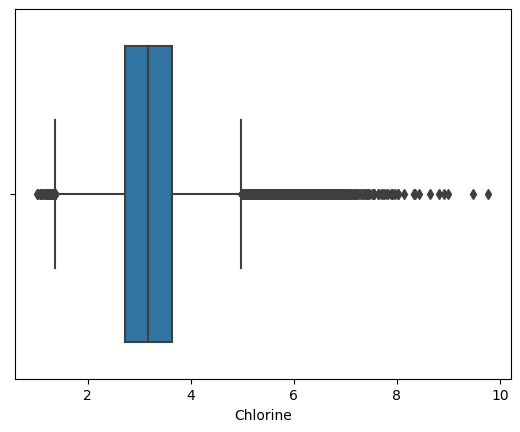

In [56]:
sns.boxplot(x='Chlorine', data=df)

In [57]:
# Calculate IQR
Q1 = df['Chlorine'].quantile(0.25)  # First quartile
Q3 = df['Chlorine'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Chlorine'] >= lower_bound) & (df['Chlorine'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
11       7.806685  1.160000e-14  8.763706   89.253163   1.360000e-46   
...           ...           ...       ...         ...            ...   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048570  8.186428  1.977157e-02  5.968850  115.963429  1.590000e-113   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Chlorine'>

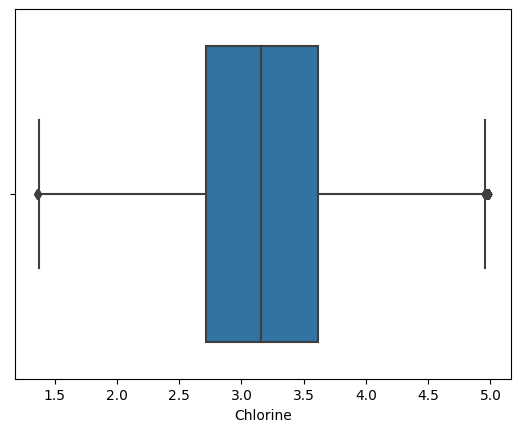

In [58]:
sns.boxplot(x='Chlorine', data=df)

<Axes: xlabel='Manganese'>

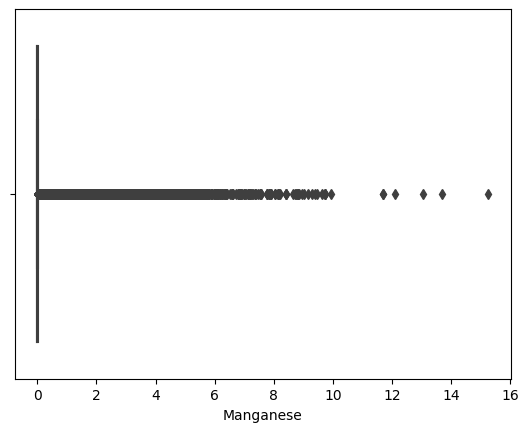

In [59]:
sns.boxplot(x='Manganese', data=df)

In [60]:
#Calculate IQR
Q1 = df['Manganese'].quantile(0.25)  # First quartile
Q3 = df['Manganese'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Manganese'] >= lower_bound) & (df['Manganese'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
11       7.806685  1.160000e-14  8.763706   89.253163   1.360000e-46   
...           ...           ...       ...         ...            ...   
1048564  8.155251  2.880000e-11  6.101454  189.267369   4.070000e-53   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Manganese'>

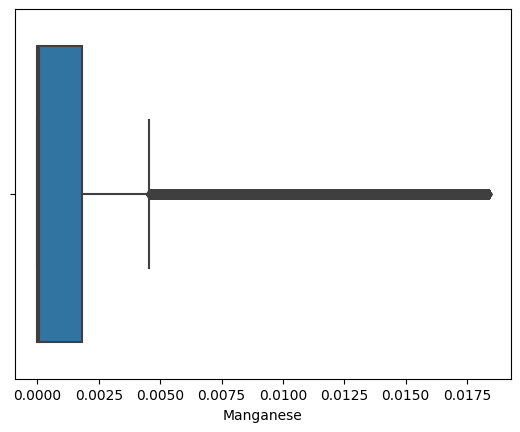

In [61]:
sns.boxplot(x='Manganese', data=df)

<Axes: xlabel='Total Dissolved Solids'>

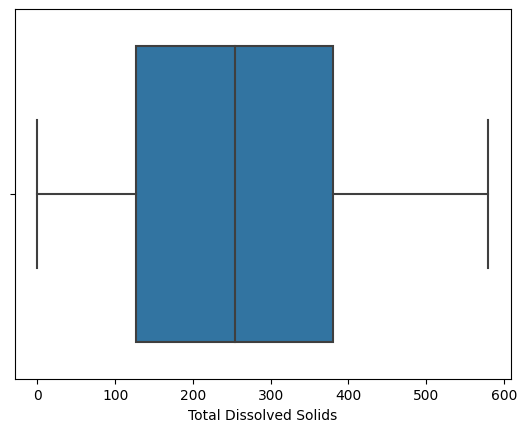

In [62]:
sns.boxplot(x='Total Dissolved Solids', data=df)

<Axes: xlabel='Water Temperature'>

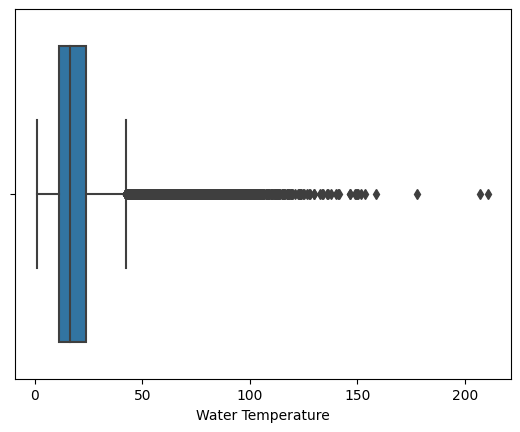

In [63]:
sns.boxplot(x='Water Temperature', data=df)

In [64]:
# Calculate IQR
Q1 = df['Water Temperature'].quantile(0.25)  # First quartile
Q3 = df['Water Temperature'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Water Temperature'] >= lower_bound) & (df['Water Temperature'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
11       7.806685  1.160000e-14  8.763706   89.253163   1.360000e-46   
...           ...           ...       ...         ...            ...   
1048564  8.155251  2.880000e-11  6.101454  189.267369   4.070000e-53   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Water Temperature'>

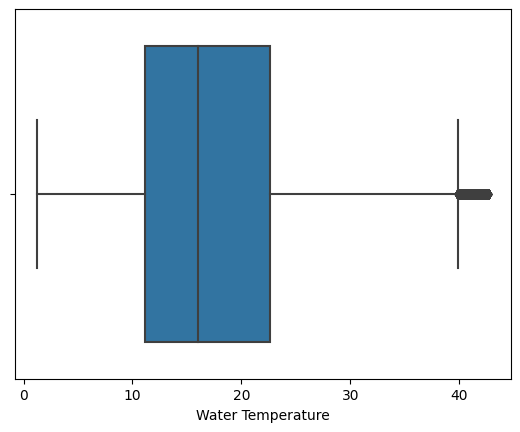

In [65]:
sns.boxplot(x='Water Temperature', data=df)

<Axes: xlabel='Air Temperature'>

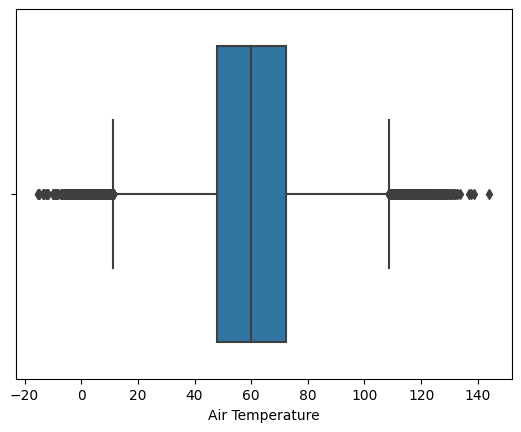

In [66]:
sns.boxplot(x='Air Temperature', data=df)

In [67]:
# Calculate IQR
Q1 = df['Air Temperature'].quantile(0.25)  # First quartile
Q3 = df['Air Temperature'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                # Interquartile Range

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Air Temperature'] >= lower_bound) & (df['Air Temperature'] <= upper_bound)]
print(df)

               pH          Iron   Nitrate    Chloride           Lead  \
1        6.917863  8.050000e-05  3.734167  227.029851   7.850000e-94   
4        8.091909  2.167128e-03  9.925788  186.540872  4.170000e-132   
7        7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
9        7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
11       7.806685  1.160000e-14  8.763706   89.253163   1.360000e-46   
...           ...           ...       ...         ...            ...   
1048564  8.155251  2.880000e-11  6.101454  189.267369   4.070000e-53   
1048567  6.848918  4.700000e-05  6.729904  127.199595   1.410000e-31   
1048568  7.753738  2.187930e-04  4.046425  121.272767   7.670000e-48   
1048569  6.957090  3.823323e-03  2.256611  142.981428   3.700000e-52   
1048574  8.330849  2.996820e-04  2.360790  187.440277  5.650000e-243   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
1        1.245317   0.019007  0.622874  0.437835  1.686049  1

<Axes: xlabel='Air Temperature'>

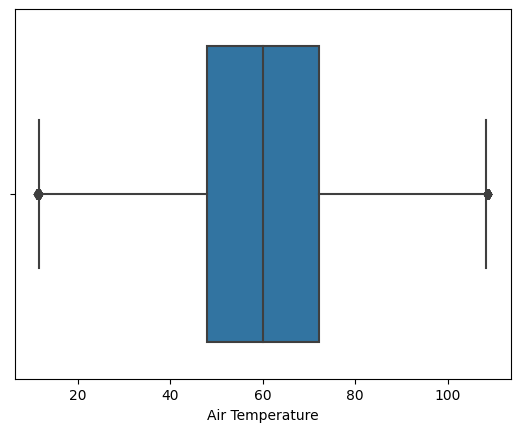

In [68]:
sns.boxplot(x='Air Temperature', data=df)

<Axes: xlabel='Target'>

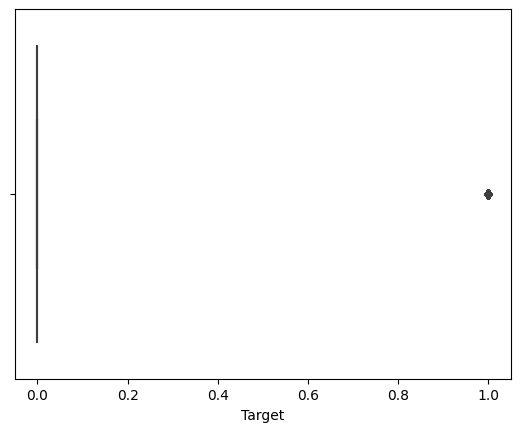

In [69]:
sns.boxplot(x='Target', data=df)

In [70]:
X

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature
1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,15.348981,71.220586
2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,11.643467,44.891330
4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,15.249416,69.336671
7,7.258203,6.110000e-09,9.261676,182.242341,4.400000e-224,0.416478,0.047803,1.016196,0.298093,3.144199,114.551427,160.062557,2.325094,6.020000e-16,214.553104,15.891905,61.139140
9,7.100650,3.019038e-03,3.620641,157.043934,6.460000e-148,0.112994,0.050613,0.842107,0.391602,2.713379,167.417837,583.295321,2.284971,8.840000e-07,113.909077,11.899376,14.010268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.186428,1.977157e-02,5.968850,115.963429,1.590000e-113,2.277221,0.020610,1.194165,0.006663,3.149487,43.969084,227.409325,2.718928,2.603963e-02,220.571485,5.491908,43.817452
1048571,8.046225,1.160000e-05,3.678714,148.053168,5.930000e-25,0.483369,0.878835,1.203689,0.171610,0.894528,74.133056,124.828663,2.312058,4.427830e-02,406.095969,10.143768,34.626853
1048572,7.443582,3.103077e-03,7.893399,174.677900,1.080000e-15,1.461659,0.701053,0.115412,0.641379,3.150154,201.977606,337.630357,3.410297,2.350000e-05,439.086461,14.612881,55.460415
1048573,6.897232,6.980000e-10,5.757980,125.564223,1.300000e-18,0.804589,0.156424,0.554729,0.018875,1.997442,204.391754,569.077747,2.803234,3.220000e-19,278.051032,7.351956,65.055864


In [71]:
y

1          0
2          0
4          0
7          0
9          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: Target, Length: 750935, dtype: int64

In [72]:
X.shape, y.shape

((750935, 17), (750935,))

In [73]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [74]:
X = scaler.fit_transform(X)
X

array([[-0.62636625, -0.25757569, -0.74865168, ...,  0.12848215,
        -0.33403457,  0.6185035 ],
       [-2.36480601, -0.21241801, -0.72219693, ...,  1.97743312,
        -0.65959274, -0.83767474],
       [ 0.75821227, -0.25287029,  1.2289329 , ..., -0.62665621,
        -0.34278212,  0.51431079],
       ...,
       [-0.0063746 , -0.2507597 ,  0.57979418, ...,  1.12900124,
        -0.39870666, -0.25313591],
       [-0.65069716, -0.25775722, -0.10225198, ...,  0.08578477,
        -1.03663529,  0.27755448],
       [ 1.03999965, -0.25708143, -1.18730397, ..., -0.20966963,
        -0.76060776, -0.04270993]])

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [77]:
X_train

array([[-0.1600148 , -0.25764199,  0.7024501 , ..., -0.02012598,
         0.62010389,  1.47387584],
       [-0.48092767, -0.23254911,  0.67493557, ..., -0.34767196,
        -0.23346668, -0.64989108],
       [ 0.62626824, 15.08658929,  2.17484073, ..., -0.98920326,
        -1.27541574,  0.88474833],
       ...,
       [-0.98675444, -0.25775018, -0.06162438, ..., -0.99131925,
        -0.11525909,  0.4071129 ],
       [-0.48028996, -0.25738186,  0.44583849, ...,  0.92463457,
         0.23816187, -1.19509773],
       [-0.21699138, -0.25775721, -0.8860796 , ...,  0.40802077,
         0.26902828, -0.22541971]])

In [78]:
X_test

array([[ 2.00387586, -0.25758787,  0.42417638, ..., -0.62932232,
         0.41580015, -0.85579673],
       [ 0.94931454, -0.09895293,  1.36175101, ..., -1.31667481,
        -0.14603442, -1.49001093],
       [ 0.753051  , -0.25775635, -1.06816179, ..., -0.91498239,
         1.12020695,  0.12237701],
       ...,
       [-0.07436655, -0.20764924,  0.91601041, ..., -1.58340074,
         0.07865233, -0.64081931],
       [-1.08769317, -0.25433561,  0.66311106, ...,  0.16509644,
         0.21498199, -0.70897828],
       [-1.08230061, -0.20680132, -1.20018941, ..., -0.44928795,
         1.52706305,  0.23419768]])

In [79]:
y_train

436584    0
898375    0
702294    1
270062    1
395186    1
         ..
361777    1
511204    0
184520    0
937241    0
170390    0
Name: Target, Length: 563201, dtype: int64

In [80]:
y_test

300424     1
362375     1
1042917    0
455106     0
59885      0
          ..
218135     0
266895     1
368679     1
865408     0
53326      0
Name: Target, Length: 187734, dtype: int64

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Creating model object
model_lg = LogisticRegression()
# Training Model
model_lg.fit(X_train, y_train)
LogisticRegression()
# Making Prediction
pred_lg = model_lg.predict(X_test)
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.8038661084300127


In [82]:
p1=model_lg.predict(scaler.transform([[6.917863,	8.050000e-05,	3.734167,	227.029851	,7.850000e-94,	1.245317,	0.019007,	0.622874,	0.437835,	1.686049,	144.010981,	432.844908,	3.292038,	8.020000e-07,	284.641984,	15.348981,	71.220586]]))
print(p1)

[0]


In [83]:
print(classification_report(y_test,pred_lg))


              precision    recall  f1-score   support

           0       0.83      0.95      0.88    144407
           1       0.65      0.33      0.44     43327

    accuracy                           0.80    187734
   macro avg       0.74      0.64      0.66    187734
weighted avg       0.78      0.80      0.78    187734



<Axes: >

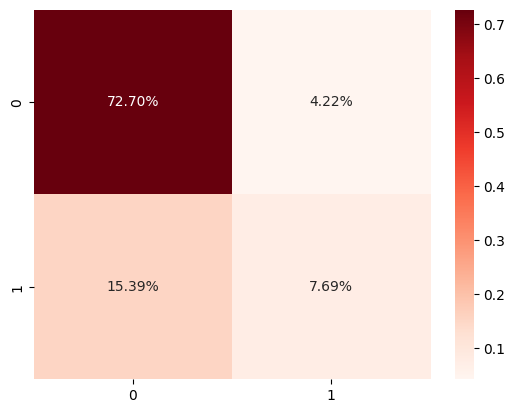

In [84]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [85]:
from sklearn.tree import DecisionTreeClassifier
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
# Training Model
model_dt.fit(X_train,y_train)
# Making Prediction
pred_dt = model_dt.predict(X_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.8457338574791993


In [86]:
p2=model_dt.predict(scaler.transform([[6.917863,	8.050000e-05,	3.734167,	227.029851	,7.850000e-94,	1.245317,	0.019007,	0.622874,	0.437835,	1.686049,	144.010981,	432.844908,	3.292038,	8.020000e-07,	284.641984,	15.348981,	71.220586]]))
print(p2)

[0]


In [87]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90    144407
           1       0.65      0.73      0.69     43327

    accuracy                           0.85    187734
   macro avg       0.78      0.80      0.79    187734
weighted avg       0.85      0.85      0.85    187734



<Axes: >

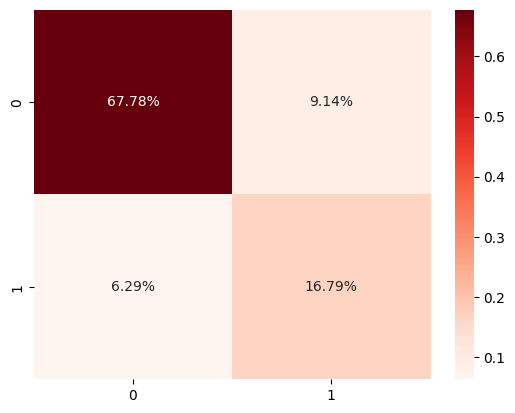

In [88]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [89]:
from sklearn.ensemble import RandomForestClassifier
# Creating model object
model_rf = RandomForestClassifier()
# Training Model
model_rf.fit(X_train, y_train)
# Making Prediction
pred_rf = model_rf.predict(X_test)
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.8743168525679952


In [90]:
p3=model_rf.predict(scaler.transform([[6.917863,	8.050000e-05,	3.734167,	227.029851	,7.850000e-94,	1.245317,	0.019007,	0.622874,	0.437835,	1.686049,	144.010981,	432.844908,	3.292038,	8.020000e-07,	284.641984,	15.348981,	71.220586]]))
print(p3)

[0]


In [91]:
print(classification_report(y_test,pred_rf))


              precision    recall  f1-score   support

           0       0.99      0.85      0.91    144407
           1       0.65      0.96      0.78     43327

    accuracy                           0.87    187734
   macro avg       0.82      0.91      0.85    187734
weighted avg       0.91      0.87      0.88    187734



<Axes: >

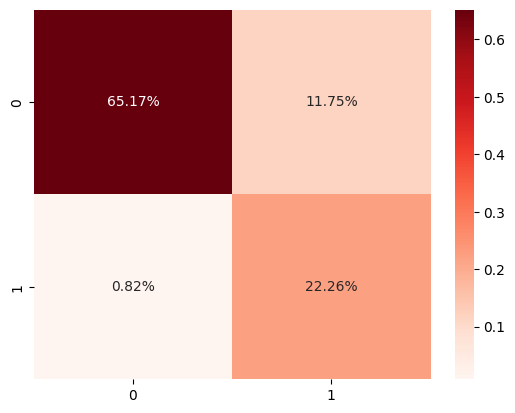

In [92]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [93]:
from sklearn.neighbors import KNeighborsClassifier
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=3, leaf_size=50)
# Training Model
model_kn.fit(X_train, y_train)
# Making Prediction
pred_kn = model_kn.predict(X_test)
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.8229676030980003


In [94]:
p4=model_kn.predict(scaler.transform([[6.917863,	8.050000e-05,	3.734167,	227.029851	,7.850000e-94,	1.245317,	0.019007,	0.622874,	0.437835,	1.686049,	144.010981,	432.844908,	3.292038,	8.020000e-07,	284.641984,	15.348981,	71.220586]]))
print(p4)

[0]


In [95]:
print(classification_report(y_test,pred_kn))


              precision    recall  f1-score   support

           0       0.86      0.91      0.89    144407
           1       0.65      0.52      0.57     43327

    accuracy                           0.82    187734
   macro avg       0.75      0.72      0.73    187734
weighted avg       0.81      0.82      0.82    187734



<Axes: >

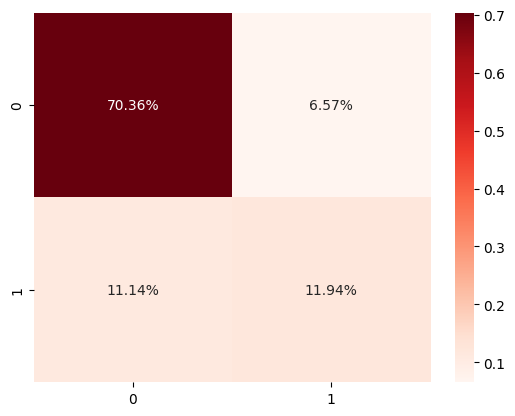

In [96]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [97]:
from sklearn.naive_bayes import GaussianNB

# Creating model object
model_gnb = GaussianNB()

# Training Model
model_gnb.fit(X_train, y_train)

# Making Prediction
pred_gnb = model_gnb.predict(X_test)

# Calculating Accuracy Score (assuming you have imported accuracy_score)
gnb = accuracy_score(y_test, pred_gnb)

print(gnb)

0.8167513609681784


In [98]:
p5=model_kn.predict(scaler.transform([[6.917863,	8.050000e-05,	3.734167,	227.029851	,7.850000e-94,	1.245317,	0.019007,	0.622874,	0.437835,	1.686049,	144.010981,	432.844908,	3.292038,	8.020000e-07,	284.641984,	15.348981,	71.220586]]))
print(p5)

[0]


In [99]:
print(classification_report(y_test,pred_gnb))


              precision    recall  f1-score   support

           0       0.85      0.92      0.89    144407
           1       0.64      0.46      0.54     43327

    accuracy                           0.82    187734
   macro avg       0.75      0.69      0.71    187734
weighted avg       0.80      0.82      0.81    187734



<Axes: >

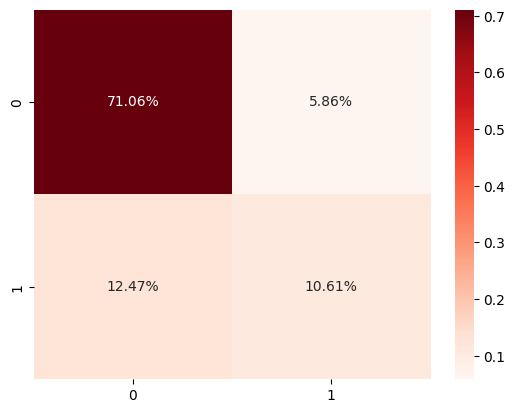

In [100]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_gnb)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [101]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test are already defined
# Standardizing the data for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using LinearSVC
model_linear_svc = LinearSVC(max_iter=10000, random_state=42)  # Increased max_iter for convergence
model_linear_svc.fit(X_train_scaled, y_train)

# Making Predictions
pred_linear_svc = model_linear_svc.predict(X_test_scaled)

# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_linear_svc)
print(f"Accuracy with LinearSVC: {sv}")


Accuracy with LinearSVC: 0.8004943164264331


In [102]:
p6=model_linear_svc.predict(scaler.transform([[6.917863,	8.050000e-05,	3.734167,	227.029851	,7.850000e-94,	1.245317,	0.019007,	0.622874,	0.437835,	1.686049,	144.010981,	432.844908,	3.292038,	8.020000e-07,	284.641984,	15.348981,	71.220586]]))
print(p6)

[1]


In [104]:
print(classification_report(y_test,pred_linear_svc))


              precision    recall  f1-score   support

           0       0.82      0.95      0.88    144407
           1       0.65      0.30      0.41     43327

    accuracy                           0.80    187734
   macro avg       0.73      0.62      0.64    187734
weighted avg       0.78      0.80      0.77    187734



<Axes: >

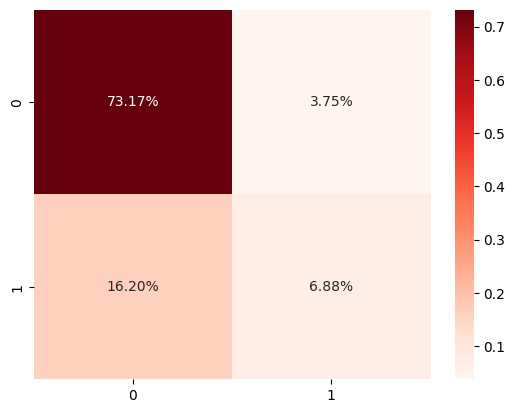

In [106]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_linear_svc)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

,Model,Accuracy_score,Prediction
2,Random Forest,0.874317,[0]
1,Decision Tree,0.845734,[0]
3,KNeighbours,0.822968,[0]
4,GNB,0.816751,[0]
0,Logistic Regression,0.803866,[0]
5,SVM,0.800494,[1]


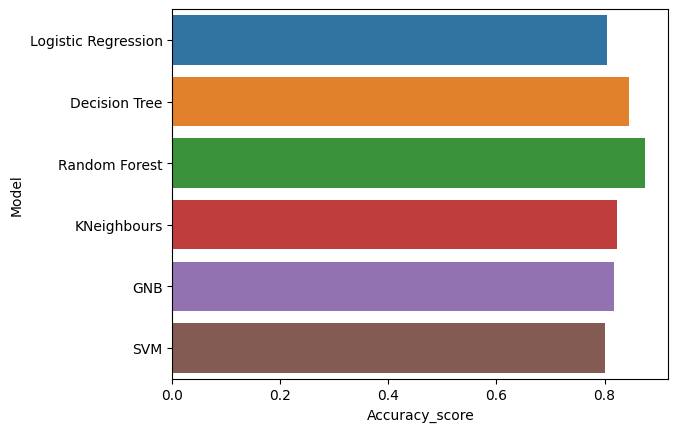

In [109]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbours', 'GNB','SVM'],
    'Accuracy_score' :[lg, dt, rf, kn, gnb, sv],
    'Prediction':[p1,p2,p3,p4,p5,p6]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)